В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [56]:
cars_df = pd.read_csv('cars.csv')


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [57]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [58]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [59]:
for column in cars_df.columns:
    print(f'Унікальні значення для колонки {column}:')
    print(cars_df[column].unique())
    print()

Унікальні значення для колонки Car_ID:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

Унікальні значення для колонки Brand:
['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']

Унікальні значення для колонки Model:
['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V

1. Маємо 13 колонок, 8 числових та 5 категоріальних.
2. 2 колонки бінарні (Transmission, Fuel_Type)
3. 3 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку (Owner_Type, Model, Brand)
4. 2 колонки (Owner_Type і Seats) де можна встановити відношення порядку, хоча Seats це числова колонка, але маємо таке відношення 4 < 5 < 7. Owner_Type має відношення First < Second < Third. Можемо колонку Owner_Type змінити на відповідні числові значення. First = 1 < Second = 2 < Third = 3
5. колонка Car_ID не має ніякого значення для аналізу та навчання, бо це просто порядковий номер запису.
6. Колонки з типом даних object мають строкові значення. колонка Owner_Type: по факту містить числа записані строками 'First' 'Second' 'Third'.



**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [60]:
y = cars_df['Price']
X = cars_df.drop(columns=['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80, 12)
X_test shape: (20, 12)
y_train shape: (80,)
y_test shape: (20,)


Бачимо, що розділення даних відпрацювало коректно, маємо розподіл 80 на 20.

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [61]:
# 1
X_train['Fuel_Type'].value_counts(), X_train['Transmission'].value_counts(), X_test['Fuel_Type'].value_counts(), X_test['Transmission'].value_counts()

(Fuel_Type
 Petrol    41
 Diesel    39
 Name: count, dtype: int64,
 Transmission
 Automatic    49
 Manual       31
 Name: count, dtype: int64,
 Fuel_Type
 Petrol    11
 Diesel     9
 Name: count, dtype: int64,
 Transmission
 Manual       12
 Automatic     8
 Name: count, dtype: int64)

In [62]:
fuel_type_codes = {'Petrol': 1, 'Diesel': 0}
X_train['Fuel_Type'] = X_train['Fuel_Type'].map(fuel_type_codes)
X_test['Fuel_Type'] = X_test['Fuel_Type'].map(fuel_type_codes)

transmission_codes = {'Automatic': 1, 'Manual': 0}
X_train['Transmission'] = X_train['Transmission'].map(transmission_codes)
X_test['Transmission'] = X_test['Transmission'].map(transmission_codes)

In [63]:
# 2
encoder = preprocessing.OneHotEncoder()
encoder.fit(X_train[['Brand']])
print(encoder.categories_)

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]


In [64]:
one_hot_train = encoder.transform(X_train[['Brand']]).toarray()
one_hot_test = encoder.transform(X_test[['Brand']]).toarray()

print(encoder.categories_[0])

['Audi' 'BMW' 'Ford' 'Honda' 'Hyundai' 'Mahindra' 'Maruti' 'Mercedes'
 'Tata' 'Toyota' 'Volkswagen']


In [65]:
X_train[encoder.categories_[0]] = one_hot_train
X_test[encoder.categories_[0]] = one_hot_test


In [66]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Тут відбулось кодування колонки 'Owner_Type' шляхом приведення категоріальних значень до числових враховуючи заданий порядок. 1 - 2 - 3. Тут ми розуміємо, хоча колонка була категоріальною, але є певний порядок у цих значеннях, чим більша цифра, тим більше власників.

In [67]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,0,1,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,1,1,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Очікуваний результат після трансформацій:

In [ ]:
# pd.set_option('display.max_columns', 100)
# display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [ ]:
# Model coding: роздилимо моделі на типи моделей - седан (Sedan), хетчбек (Hatchback), позашляховик (SUV)
# ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
#  'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
#  'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
#  'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
#  'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
#  'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
#  'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']

#{
#     'Corolla': 'Sedan', 'Civic': 'Sedan', 'Mustang': 'Sedan', 'Sonata': 'Sedan',
#     'Polo': 'Sedan', 'A4': 'Sedan', 'X1': 'Sedan', 'C-Class': 'Sedan',
#     'City': 'Sedan', 'Verna': 'Sedan', 'Passat': 'Sedan', 'A6': 'Sedan',
#     'E-Class': 'Sedan', 'Aspire': 'Sedan', 'Elantra': 'Sedan', 'A3': 'Sedan',
#     '7 Series': 'Sedan', 'Camry': 'Sedan', 'Vento': 'Sedan', 'A5': 'Sedan',
#     '3 Series': 'Sedan',

#     'Scorpio': 'SUV', 'Creta': 'SUV', 'Harrier': 'SUV',
#     'Tiguan': 'SUV', 'Q3': 'SUV', '5 Series': 'SUV',
#     'GLC': 'SUV', 'Innova': 'SUV', 'Thar': 'SUV',
#     'X3': 'SUV', 'Fortuner': 'SUV', 'Safari': 'SUV',
#     'Vitara': 'SUV', 'BR-V': 'SUV', 'T-Roc': 'SUV',
#     'Q7': 'SUV', 'X5': 'SUV', 'GLA': 'SUV',
#     'Venue': 'SUV', 'XUV300': 'SUV', 'Innova Crysta': 'SUV',
#     'EcoSport': 'SUV', 'Ranger': 'SUV',

#     'Swift': 'Hatchback', 'Nexon': 'Hatchback', 'Ertiga': 'Hatchback',
#     'Altroz': 'Hatchback', 'WR-V': 'Hatchback', 'Ameo': 'Hatchback',
#     'Yaris': 'Hatchback', 'Santro': 'Hatchback', 'Tigor': 'Hatchback',
#     'S-Cross': 'Hatchback', 'Tiago': 'Hatchback'
# }

In [76]:
mapped_models = {
    'Corolla': 'Sedan', 'Civic': 'Sedan', 'Mustang': 'Sedan', 'Sonata': 'Sedan',
    'Polo': 'Sedan', 'A4': 'Sedan', 'X1': 'Sedan', 'C-Class': 'Sedan',
    'City': 'Sedan', 'Verna': 'Sedan', 'Passat': 'Sedan', 'A6': 'Sedan',
    'E-Class': 'Sedan', 'Aspire': 'Sedan', 'Elantra': 'Sedan', 'A3': 'Sedan',
    '7 Series': 'Sedan', 'Camry': 'Sedan', 'Vento': 'Sedan', 'A5': 'Sedan',
    '3 Series': 'Sedan',

    'Scorpio': 'SUV', 'Creta': 'SUV', 'Harrier': 'SUV',
    'Tiguan': 'SUV', 'Q3': 'SUV', '5 Series': 'SUV',
    'GLC': 'SUV', 'Innova': 'SUV', 'Thar': 'SUV',
    'X3': 'SUV', 'Fortuner': 'SUV', 'Safari': 'SUV',
    'Vitara': 'SUV', 'BR-V': 'SUV', 'T-Roc': 'SUV',
    'Q7': 'SUV', 'X5': 'SUV', 'GLA': 'SUV',
    'Venue': 'SUV', 'XUV300': 'SUV', 'Innova Crysta': 'SUV',
    'EcoSport': 'SUV', 'Ranger': 'SUV', 'GLE': 'SUV', 'Endeavour': 'SUV',

    'Swift': 'Hatchback', 'Nexon': 'Hatchback', 'Ertiga': 'Hatchback',
    'Altroz': 'Hatchback', 'WR-V': 'Hatchback', 'Ameo': 'Hatchback',
    'Yaris': 'Hatchback', 'Santro': 'Hatchback', 'Tigor': 'Hatchback',
    'S-Cross': 'Hatchback', 'Tiago': 'Hatchback', 'Figo': 'Hatchback'
}

X_train['Model_Type'] = X_train['Model'].map(mapped_models)
X_test['Model_Type'] = X_test['Model'].map(mapped_models)
display(X_train.head()), display(X_test.head()), X_train.isnull().sum(), X_test.isnull().sum()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Type
83,84,Volkswagen,T-Roc,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,SUV
55,56,Audi,A5,2018,28000,0,1,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sedan
26,27,Audi,A6,2018,28000,1,1,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sedan
54,55,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Sedan
19,20,Mercedes,GLC,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,SUV


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Type
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SUV
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Hatchback
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Sedan
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Hatchback
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Sedan


(None,
 None,
 Car_ID               0
 Brand                0
 Model                0
 Year                 0
 Kilometers_Driven    0
 Fuel_Type            0
 Transmission         0
 Owner_Type           0
 Mileage              0
 Engine               0
 Power                0
 Seats                0
 Audi                 0
 BMW                  0
 Ford                 0
 Honda                0
 Hyundai              0
 Mahindra             0
 Maruti               0
 Mercedes             0
 Tata                 0
 Toyota               0
 Volkswagen           0
 Owner_Type_Codes     0
 Model_Type           0
 dtype: int64,
 Car_ID               0
 Brand                0
 Model                0
 Year                 0
 Kilometers_Driven    0
 Fuel_Type            0
 Transmission         0
 Owner_Type           0
 Mileage              0
 Engine               0
 Power                0
 Seats                0
 Audi                 0
 BMW                  0
 Ford                 0
 Honda     

Додали колонку з типом моделі, де є лише три значення, в залежності від типу кузова та перевірили, що у нас немає нульових значень. Тепер можна для нової колонки Model_Type використати OneHotEncoder

In [77]:
encoder_model_type = preprocessing.OneHotEncoder()
encoder_model_type.fit(X_train[['Model_Type']])
print(encoder_model_type.categories_)

one_hot_train_model = encoder_model_type.transform(X_train[['Model_Type']]).toarray()
one_hot_test_model = encoder_model_type.transform(X_test[['Model_Type']]).toarray()

print(encoder_model_type.categories_[0])

X_train[encoder_model_type.categories_[0]] = one_hot_train_model
X_test[encoder_model_type.categories_[0]] = one_hot_test_model

[array(['Hatchback', 'SUV', 'Sedan'], dtype=object)]
['Hatchback' 'SUV' 'Sedan']


In [78]:
X_test.isnull().sum()

,0
Car_ID,0
Brand,0
Model,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


Виконали кодування та переконались, що у тестовому наборі немає нульових значень.

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

Колонки, що корелюють з цільовою змінною на більше ніж 0.5 за модулем:
Transmission    0.680731
Mileage        -0.638404
Engine          0.710561
Power           0.849137
Hatchback      -0.544112
Name: Price, dtype: float64


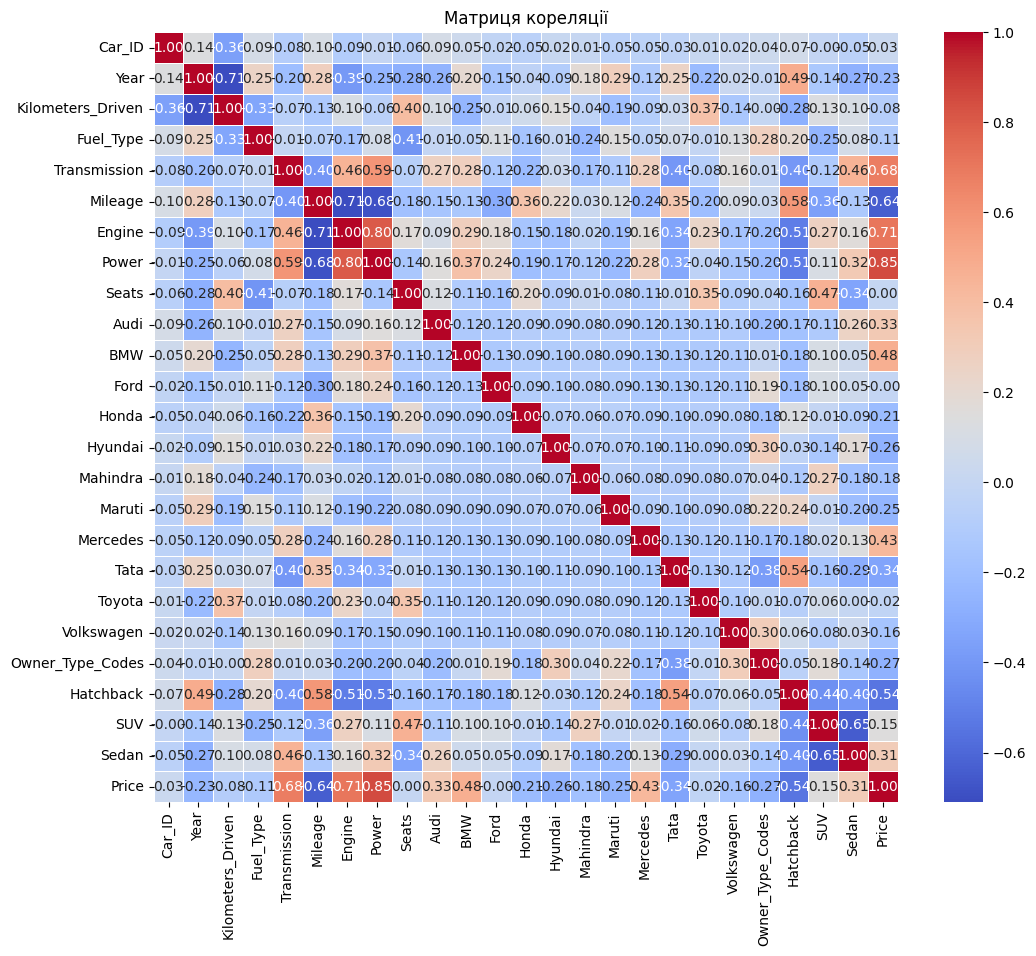

In [87]:
X_train_numeric = X_train.select_dtypes(include=['number'])
X_train_data = pd.concat([X_train_numeric, y_train], axis=1)

correlation_matrix = X_train_data.corr()

target_correlation = correlation_matrix.iloc[:-1, -1]

high_correlation = target_correlation[target_correlation.abs() > 0.5]

print("Колонки, що корелюють з цільовою змінною на більше ніж 0.5 за модулем:")
print(high_correlation)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матриця кореляції')
plt.show()

Бачимо, що у цільвої змінної присутня як позитивна так і негативна кореляція з різними колонками. Mileage (-0.638404) має негативну кореляцію. Engine (0.710561), Power (0.849137) мають позитивну кореляцію. Transmission    (0.680731) таккож має позитивну, кореляцію (цю колонку ми змінювали). А також колонка Hatchback      -0.544112 має негативну кореляцію (при чому, що ця колонка зʼявилась в процесі кодування колонки Модель).

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [90]:
# 0
X_test_numeric = X_test.select_dtypes(include=['number'])

In [91]:
# 1
model = LinearRegression()
model.fit(X_train_numeric, y_train)

LinearRegression()

In [95]:
# 2
y_train_pred = model.predict(X_train_numeric)
y_test_pred = model.predict(X_test_numeric)


train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"RMSE на тренувальному наборі: {train_rmse}")
print(f"RMSE на тестовому наборі: {test_rmse}")

RMSE на тренувальному наборі: 200757.68509571467
RMSE на тестовому наборі: 267524.8815426874


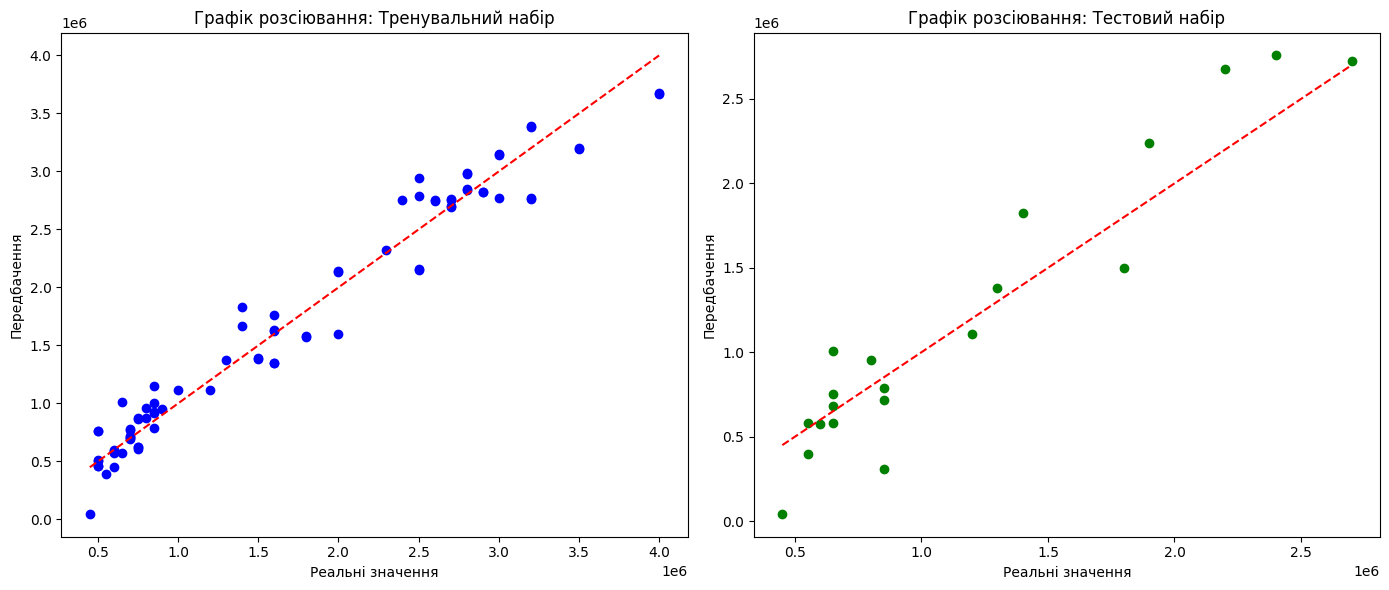

In [122]:
# 3
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Графік розсіювання: Тренувальний набір')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')

# Тестовий набір
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Графік розсіювання: Тестовий набір')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')

plt.tight_layout()
plt.show()

Бачимо, що на тренувальних даних модель спрацювала краще, на тестовому наборі даних більшість точок знаходяться далеко від лінії ідеального передбачення.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [133]:
scaler = StandardScaler()
X_scaled_train_data = scaler.fit_transform(X_train_numeric)
X_scaled_test_data = scaler.transform(X_test_numeric)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled_train_data, y_train)

coefficients = model_scaled.coef_

coeff_df = pd.DataFrame(coefficients, index=X_train_numeric.columns, columns=['Coefficient'])

coeff_df.sort_values('Coefficient', ascending=False)


,Coefficient
Power,476602.562724
Audi,213148.664333
Mercedes,205830.063635
BMW,188981.829703
Transmission,130383.742075
SUV,53425.544304
Owner_Type_Codes,35773.627324
Toyota,26869.491167
Year,22396.351249
Car_ID,4270.377386


У попередньому аналізі у нас була така кореляція


*   Transmission    0.680731
*   Engine          0.710561
*   Power           0.849137
*   Mileage        -0.638404
*   Hatchback      -0.544112

тут ми бачимо такі найбільші коефіцієнти
*   Power	476602.562724
*   Audi	213148.664333
*   Mercedes	205830.063635
*   BMW	188981.829703
*   Transmission	130383.742075
*   Hyundai	-154705.119189
*   Mahindra	-165349.213240
*   Fuel_Type	-173869.237090

У Power найбільший коефіцієнт кореляції та коеф моделі. Цікаво, що серед найбільших коефіцієнтів у моделі багато марок машин. Найбільші позитивні коефіцієнти мають Audi, Mercedes, BMW. Загалом доволі логічно, що саме ці марки мають найбільші коефіцієнти. Є питання до Fuel_Type, у нас там всього два значення (1 - бензинові, 0 - дизельні), і виходить, що бензинові машини мають меншу вартість.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [161]:
X_scaled_train_df = pd.DataFrame(X_scaled_train_data, columns=X_train_numeric.columns)

X_train_with_intercept = sm.add_constant(X_scaled_train_df)
print(X_train_with_intercept.columns)

model_statsmodels = sm.OLS(y_train, X_train_with_intercept)

results = model_statsmodels.fit()
print(results.params)
print(results.summary())

p_values = results.pvalues

significant_features = p_values[p_values < 0.05]

formatted_significant_features = significant_features.apply(lambda x: f"{x:.5f}")
print("\nСтатистично значущі змінні (p-value < 0.05):")
print(formatted_significant_features)

Index(['const', 'Car_ID', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Mileage', 'Engine', 'Power', 'Seats', 'Audi', 'BMW',
       'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata',
       'Toyota', 'Volkswagen', 'Owner_Type_Codes', 'Hatchback', 'SUV',
       'Sedan'],
      dtype='object')
const                1.680000e+06
Car_ID               4.270377e+03
Year                 2.239635e+04
Kilometers_Driven   -9.140135e+04
Fuel_Type           -1.738692e+05
Transmission         1.303837e+05
Mileage             -8.893773e+04
Engine              -2.745733e+03
Power                4.766026e+05
Seats               -3.048097e+04
Audi                 2.131487e+05
BMW                  1.889818e+05
Ford                -1.198374e+05
Honda               -6.060460e+04
Hyundai             -1.547051e+05
Mahindra            -1.653492e+05
Maruti              -1.100812e+05
Mercedes             2.058301e+05
Tata                -4.411451e+04
Toyota               2

Бачимо, що стат значущі категорії на рівні p-value майже співпадають з колонками, які і в попередніх дослідженнях мали кореляцію з цільовим значенням. Тут маємо 12 колонок, які мають стат значущість.

спостерігаємо таке повідомлення
[2] The smallest eigenvalue is 4.63e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
Розуміємо, що воно виникло через те, що підчас кодування у нас зʼявилась мультиколінеарність. спробуємо прибрати по одній колонці з колонок, отриманих в результаті OneHotEncoding.

In [163]:
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(X_scaled_train_df.values, i) for i in range(X_scaled_train_df.shape[1])]
vif_data["Feature"] = X_scaled_train_df.columns
print(vif_data)

         VIF            Feature
0   1.519871             Car_ID
1   5.230911               Year
2   5.817378  Kilometers_Driven
3   2.854145          Fuel_Type
4   2.886218       Transmission
5   5.007384            Mileage
6   7.223810             Engine
7   7.692075              Power
8   2.767263              Seats
9        inf               Audi
10       inf                BMW
11       inf               Ford
12       inf              Honda
13       inf            Hyundai
14       inf           Mahindra
15       inf             Maruti
16       inf           Mercedes
17       inf               Tata
18       inf             Toyota
19       inf         Volkswagen
20  3.438744   Owner_Type_Codes
21       inf          Hatchback
22       inf                SUV
23       inf              Sedan


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [172]:
# видаляємо перші колонки з  OneHotEncoding (можна було зробити на моменті застосування цього кодування)
X_scaled_train_df_non_multicol = X_scaled_train_df.drop(['Audi', 'Hatchback'], axis=1)
X_scaled_test_df_non_multicol = X_scaled_test_df.drop(['Audi', 'Hatchback'], axis=1)

In [173]:
X_train_with_intercept = sm.add_constant(X_scaled_train_df_non_multicol)
print(X_train_with_intercept.columns)

model_statsmodels = sm.OLS(y_train, X_train_with_intercept)

results = model_statsmodels.fit()
print(results.params)
print(results.summary())

p_values = results.pvalues

significant_features = p_values[p_values < 0.05]

formatted_significant_features = significant_features.apply(lambda x: f"{x:.5f}")
print("\nСтатистично значущі змінні (p-value < 0.05):")
print(formatted_significant_features)

Index(['const', 'Car_ID', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Mileage', 'Engine', 'Power', 'Seats', 'BMW', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes', 'SUV', 'Sedan'],
      dtype='object')
const                1.680000e+06
Car_ID               4.270377e+03
Year                 2.239635e+04
Kilometers_Driven   -9.140135e+04
Fuel_Type           -1.738692e+05
Transmission         1.303837e+05
Mileage             -8.893773e+04
Engine              -2.745733e+03
Power                4.766026e+05
Seats               -3.048097e+04
BMW                 -3.552099e+04
Ford                -3.443402e+05
Honda               -2.325882e+05
Hyundai             -3.418435e+05
Mahindra            -3.201981e+05
Maruti              -2.820648e+05
Mercedes            -1.867276e+04
Tata                -2.790888e+05
Toyota              -1.862792e+05
Volkswagen          -2.934875e+05
Owner_Type_Codes

Загалом бачимо, що прибирання колонок, через які виникала мультиколінеарність не мають суттєвого впливу на результати моделі. Але бачимо, що набір статзначущих колонок змінився.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [174]:
significant_features = p_values[p_values < 0.05].index
significant_features = significant_features.drop('const')
print(significant_features)

X_train_significant = X_scaled_train_df_non_multicol[significant_features]
X_train_significant_with_intercept = sm.add_constant(X_train_significant)

model_significant = sm.OLS(y_train, X_train_significant_with_intercept)
results_significant = model_significant.fit()

print(results_significant.summary())

initial_r2 = results.rsquared
initial_adj_r2 = results.rsquared_adj

new_r2 = results_significant.rsquared
new_adj_r2 = results_significant.rsquared_adj

print("\nПорівняння метрик:")
print(f"Initial R²: {initial_r2:.5f}, Adjusted R²: {initial_adj_r2:.5f}")
print(f"New R²: {new_r2:.5f}, Adjusted R²: {new_adj_r2:.5f}")


Index(['Fuel_Type', 'Transmission', 'Power', 'Ford', 'Honda', 'Hyundai',
       'Mahindra', 'Maruti', 'Tata', 'Toyota', 'Volkswagen', 'SUV'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.92e-40
Time:                        18:42:32   Log-Likelihood:                -1096.7
No. Observations:                  80   AIC:                             2219.
Df Residuals:                      67   BIC:                             2250.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t 

Бачимо що показник R² у другої моделі трохи меньший, але різниця між ними мінімальна. Загалом бачимо, що після видалення не стат значущих категорій, модель має хоорші показники. Оскількі є різниця між показниками, то можемо сказати, що не стат значуші зміні трохи мали вплив на результати. Adjusted R² майже однакові. Ще спостерігаємо, що F-statistic у другої моделі вище - 120.5.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [175]:
features_for_10_task = p_values[p_values < 0.25].index.drop('const')
print(features_for_10_task)

X_train_10_task = X_scaled_train_df_non_multicol[features_for_10_task]
X_train_10_task_with_intercept = sm.add_constant(X_train_10_task)

model_10_task = sm.OLS(y_train, X_train_10_task_with_intercept)
results_10_task = model_10_task.fit()

print(results_10_task.summary())

initial_r2 = results.rsquared
initial_adj_r2 = results.rsquared_adj

r2_10_task = results_10_task.rsquared
adj_r2_10_task = results_10_task.rsquared_adj

print("\nПорівняння метрик:")
print(f"Initial R²: {initial_r2:.5f}, Adjusted R²: {initial_adj_r2:.5f}")
print(f"New R²: {new_r2:.5f}, Adjusted R²: {new_adj_r2:.5f}")
print(f"10_task R²: {r2_10_task:.5f}, Adjusted R²: {adj_r2_10_task:.5f}")

Index(['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage', 'Power',
       'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Tata', 'Toyota',
       'Volkswagen', 'SUV', 'Sedan'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     106.6
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.80e-39
Time:                        18:47:54   Log-Likelihood:                -1091.1
No. Observations:                  80   AIC:                             2214.
Df Residuals:                      64   BIC:                             2252.
Df Model:                          15                                         
Covariance Type:            nonrobust                                        

Бачимо, що результати останньої моделі (0.25) кращі, за ту, де p-value брали на рівні 0.05. В цьому кейсі у нас лишилось для можелі 15 категорій.
Також тут значення F-statistic: 92.90 вище, а AIC and BIC дещо нижчі. З усіх представлених моделей краще себе показала остання, тому можна вибрати її.